In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [1]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
### YOUR CODE HERE
from tensorflow.keras.regularizers import Regularizer
# Figure out how to import regularizers
###
import tensorflow.keras.utils as ku 
import numpy as np 

In [2]:
tokenizer = Tokenizer()
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt
data = open('/tmp/sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

--2020-09-10 11:28:25--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.188.128, 108.177.97.128, 108.177.125.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.188.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2020-09-10 11:28:26 (102 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]



In [13]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1)) # Embedding Layer 
model.add(Bidirectional(LSTM(150,return_sequences=True)))
model.add(Dropout(0.2)) 
model.add(LSTM(100))  #LSTM layer with 100 blocks
model.add(Dense(total_words/2,activation='relu'))  # A Dense Layer including regularizers
model.add(Dense(total_words,activation='softmax'))
# Pick an optimizer
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
print(model.summary())


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 10, 100)           321100    
_________________________________________________________________
bidirectional_5 (Bidirection (None, 10, 300)           301200    
_________________________________________________________________
dropout_5 (Dropout)          (None, 10, 300)           0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 100)               160400    
_________________________________________________________________
dense_8 (Dense)              (None, 1605)              162105    
_________________________________________________________________
dense_9 (Dense)              (None, 3211)              5156866   
Total params: 6,101,671
Trainable params: 6,101,671
Non-trainable params: 0
____________________________________________

In [14]:
 history = model.fit(predictors, label, epochs=50, verbose=1)

Epoch 1/50
484/484 [==============================] - 13s 26ms/step - loss: 6.7972 - accuracy: 0.0244
Epoch 2/50
484/484 [==============================] - 12s 26ms/step - loss: 6.4165 - accuracy: 0.0325
Epoch 3/50
484/484 [==============================] - 12s 26ms/step - loss: 6.1935 - accuracy: 0.0367
Epoch 4/50
484/484 [==============================] - 12s 26ms/step - loss: 5.9831 - accuracy: 0.0414
Epoch 5/50
484/484 [==============================] - 13s 26ms/step - loss: 5.7586 - accuracy: 0.0478
Epoch 6/50
484/484 [==============================] - 13s 26ms/step - loss: 5.5278 - accuracy: 0.0579
Epoch 7/50
484/484 [==============================] - 12s 26ms/step - loss: 5.3083 - accuracy: 0.0697
Epoch 8/50
484/484 [==============================] - 12s 26ms/step - loss: 5.0855 - accuracy: 0.0790
Epoch 9/50
484/484 [==============================] - 12s 26ms/step - loss: 4.8548 - accuracy: 0.0949
Epoch 10/50
484/484 [==============================] - 13s 26ms/step - loss: 4.608

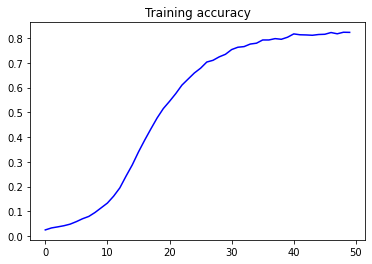

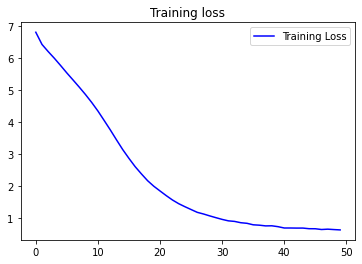

In [15]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [16]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Help me Obi Wan Kenobi, you're my only hope to thee belongs to it light reap reap now feel you dearer eye that time doth lie on thee back so bold hell doth lie thee thee with me behold look you best ' be 'tis all so dear love doth give thee that her skill 'will ' be to thee bright thee bright untrue ruining none strife none strife press press press aside green me in doubt lie to thee so bold behold do lie me me the face thou end confound find it dead esteem'd deem faith more nothing new can slain bright untrue none ' away grow
